# Students Academic Performance Level Classification

#### Visualization of students academic data & Classification of students level using different machine learning approaches

--------------------------------------------------------

### Inspiration 
-------------------------------
***The repository is developed to visualize students academic activities & other factors that impacts on students overall academic performance and also to classify students level based on their academic performance & others related informations. The datasets for the analysis are collected from [Students' Academic Performance Dataset](https://www.kaggle.com/aljarah/xAPI-Edu-Data 'Students' Academic Performance Dataset').***

***The dataset file contains data of 480 students including 17 attributes.For the analysis purpose 10 attributes from the data file including the 'Class' attribute are taken.To apply different machine learning approaches for the classification,the total dataset is divided into 400 training set & 80 test set.***


----------------------------
### Dataset Information
-----------------------------
* ***Data Set Characteristics: Multivariate***

* ***Number of Instances: 480***

* ***Area: E-learning, Education, Predictive models, Educational Data Mining***

* ***Attribute Characteristics: Integer/Categorical***

* ***Number of Attributes: 10***

* ***Associated Tasks: Classification***

* ***Missing Values? No***

* ***File formats: xAPI-Edu-Data.csv***
----------------------------------
### Attributes
----------------------------------

1. ***Gender - Student's gender (Nominal: 'Male' or 'Female’)***

2. ***Educational Stages - Educational level student belongs (Nominal: ‘lowerlevel’,’MiddleSchool’,’HighSchool’)***

3. ***Section ID- Classroom student belongs (Nominal:’A’,’B’,’C’)***

4. ***Relation - Parent responsible for the student (Nominal:’Mum’,’Father’)***

5. ***Raised Hand - How many times the student raises his/her hand on the classroom (Numeric:0-100)***

6. ***Visited Resources - How many times the student visits a course content(numeric:0-100)***

7. ***Viewing Announcements - How many times the student checks the new announcements(numeric:0-100)***

8. ***Discussion Groups - How many times the student participate in discussion groups (numeric:0-100)***

9. ***Student Absence Days - The number of absence days for each student (nominal: above-7, under-7)***

10. ***Class - Overall performance level student belongs (Nominal: 'H','M','L')***
-----------------
### The students are classified into three numerical intervals based on their total grade/mark ####
----------------

   * ***Low-Level: interval includes values from 0 to 69***

   * ***Middle-Level: interval includes values from 70 to 89***

   * ***High-Level: interval includes values from 90-100***
------------------------

### Data Visualization
-------------------------------
***At first, the whole dataset is visualized in some different ways to make the reader understand the inner relations and dependencies among the attributes more clearly. This will also help to understand the factors those impacts on the students overall academic performance.***

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np
from sklearn import datasets 


rd = pd.read_csv('edu.csv', delimiter=',');
rd[:10]  # Showing alignment of first 10 data 


gender       StageID SectionID Relation  raisedhands  VisITedResources  \
0      M  MiddleSchool         A   Father            0                 0   
1      M  MiddleSchool         B   Father            0                 2   
2      M    lowerlevel         B   Father            0                12   
3      M    lowerlevel         C   Father            0                 6   
4      F    lowerlevel         B   Father            0                 0   
5      M    HighSchool         A   Father            0                 5   
6      M    lowerlevel         C      Mum            0                 4   
7      M    lowerlevel         C   Father            0                 3   
8      M    lowerlevel         B   Father            0                 8   
9      M    lowerlevel         B   Father            1                 0   

   AnnouncementsView  Discussion StudentAbsenceDays Class  
0                  0           4            Above-7     L  
1                  3          70            Above-7     L  
2                  3           3            Above-7     M  
3                  4          15            Under-7     L  
4                  5          80            Above-7     L  
5                  7           2            Above-7     L  
6                  8          30            Above-7     L  
7                 10           3            Above-7     L  
8                 11          70            Above-7     L  
9                  1          12            Above-7     L

***Also, a better thing is to see the statistical distribution of the numerical attributes. Let's see some summary statistics about the data set.***

In [2]:
rd.describe()

raisedhands  VisITedResources  AnnouncementsView  Discussion
count   480.000000        480.000000         480.000000  480.000000
mean     46.775000         54.797917          37.918750   43.283333
std      30.779223         33.080007          26.611244   27.637735
min       0.000000          0.000000           0.000000    1.000000
25%      15.750000         20.000000          14.000000   20.000000
50%      50.000000         65.000000          33.000000   39.000000
75%      75.000000         84.000000          58.000000   70.000000
max     100.000000         99.000000          98.000000   99.000000

***As we know we are going to have some visualization fun by plotting the data, So why are we waiting for! Let's jump in!***

### ***The bellow section reflects the scatterplot distribution of the combination of each attribute. The diagonal kdeplot reflects the distribution of each attributes marking of different classes of students***

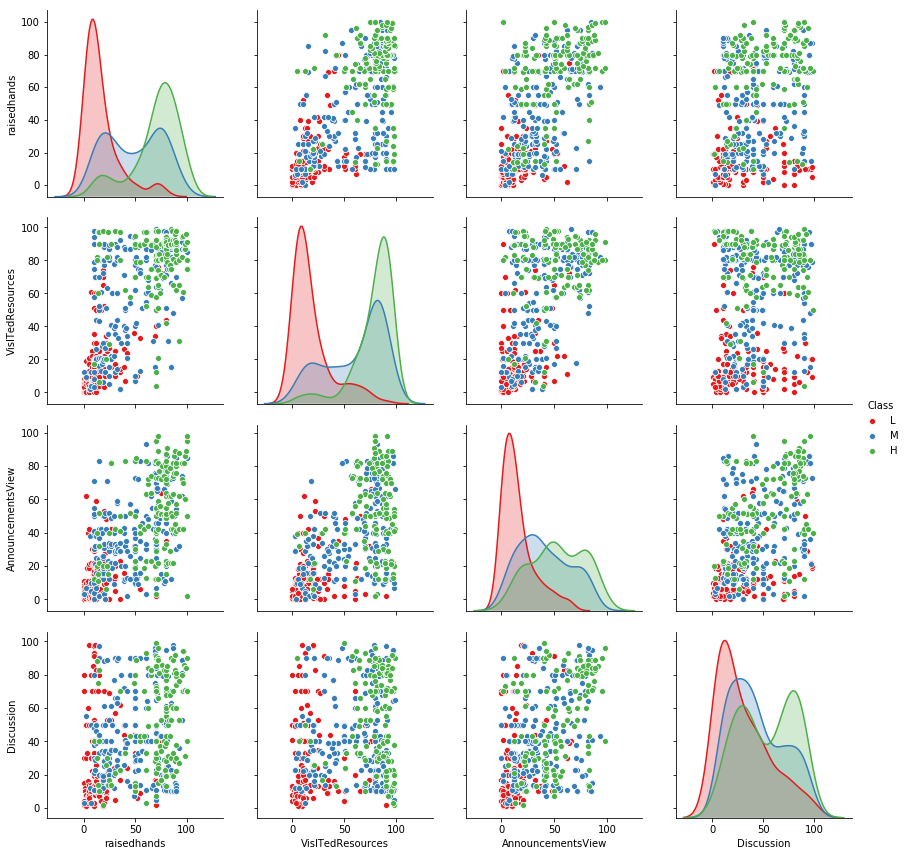

In [16]:
sb.pairplot(rd,hue='Class',palette='Set1',height=3);

### The bellow histogram also shows the distribution in discrete format

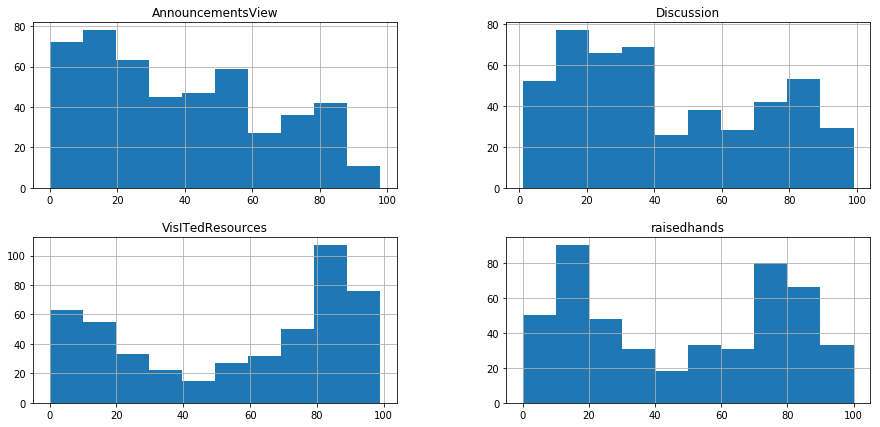

In [17]:
rd.hist(figsize=(15, 7));

***In the above histogram, X-axis defines the frequency number of a student's activity on a particular attribute and Y-axis defines the count. The histogram shows that -***

* *Majority students perform visiting resources.*
* *Majority of the students are less eager to view Announcements & to Discuss in Groups.*
* *An average situation arises in case of the hand raising. It seems students have a mixed interest in raising the hand in class.*

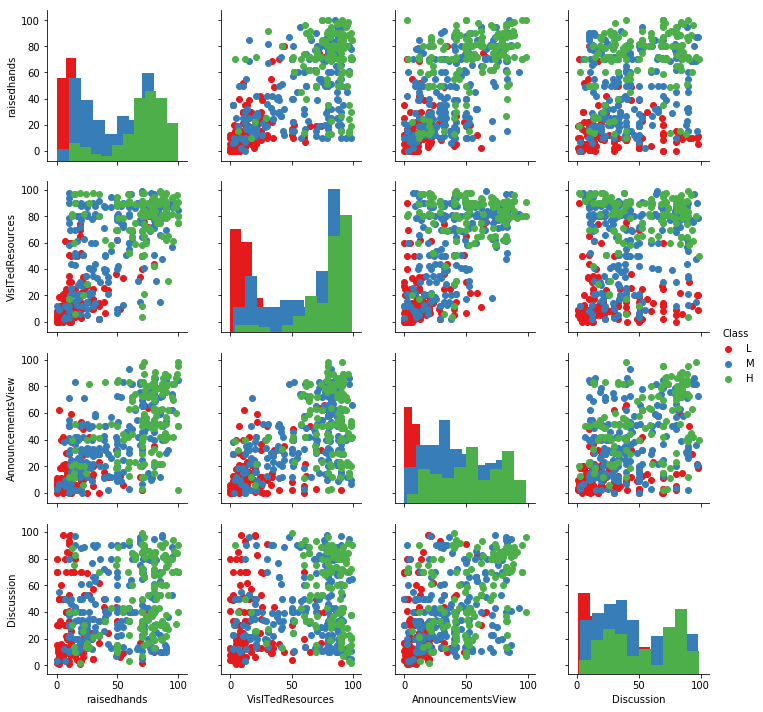

In [5]:
g = sb.PairGrid(rd, hue="Class",palette='Set1')
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();

***From the above pair plot, it is quite a lot clear to see that Hige and Low-level students are distinguishable in every combination of pair plot but Medium level students are scattered in almost everywhere and mixed up both High and Low-level students.***

### Let's make the plots much more interesting to see in swarm plot view

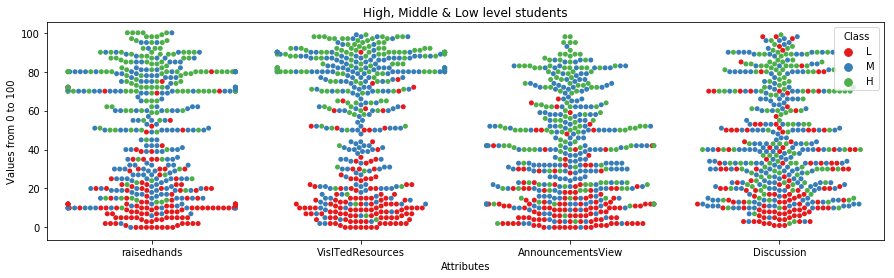

In [6]:
melt = pd.melt(rd,id_vars='Class',value_vars=['raisedhands','VisITedResources','AnnouncementsView','Discussion'])
plt.rcParams['figure.figsize']=(15,4)
sb.swarmplot(x='variable',y='value',hue='Class' , data=melt,palette='Set1')
plt.ylabel('Values from 0 to 100')
plt.xlabel('Attributes')
plt.title('High, Middle & Low level students');

***From the above swarm plot, it is noticeable that -***

* *The students who are having higher values in raising hands & visiting resources are like to be in the high level of the classification. Though high-level students have average values of participation in both viewing announcement and group discussion.*



* *The students who are having lower values in raising the hand, visiting resources & viewing the announcement are most likely to be the low level of the classification.Even though an average of them participate in group discussion.*

***From the above plottings, it is very much noticed that the students participate more in the class by raising hands & in visiting resources are most impactful to their performance. If we look at the pair plot between raised hands-VisITedResources, comparing to the other pair plots this pair combination shows much better distinguish of classification of the students level.***

------------------------------

### Visualization of catagorical data


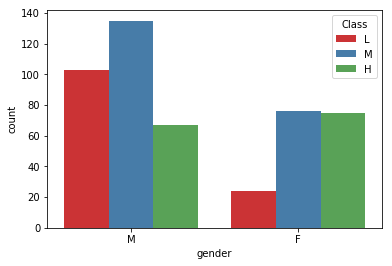

In [18]:
sb.countplot(data=rd,x='gender',hue='Class',palette='Set1');

***Though the number of male students is greater than the female but the percentage of High-level students are less than female students. On the other hand, low-level students in the male are quite a lot greater than the female students.***

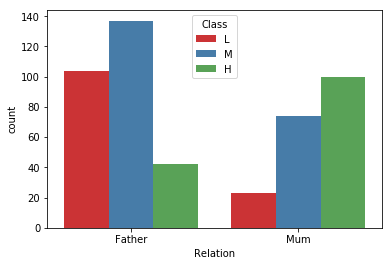

In [20]:
sb.countplot(data=rd,x='Relation',hue='Class',palette='Set1');

***It seems to have a relation with Mum has a very much positive impact on students performance***

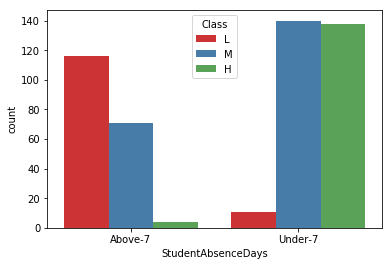

In [21]:
sb.countplot(data=rd,x='StudentAbsenceDays',hue='Class',palette='Set1');

***The above picture clearly states that the student who is absent less than 7 days is mostly the successful one. It means students absence has a high impact on their overall performance.***

--------------------------
## Classification
-----------------------------

***In this part, 3 different machine learning approaches are implemented to perform the classification/prediction of a student's level based on the given dataset. By the following machine learning approaches, I tried to make a better model to classify/predict a students level.***

* *Linear Regression*
* *Logistic Regression*
* *Artificial Neural Network*

### ***The theoretical study materials of each of the approaches can be easily found on the internet. The code for the analysis part is given below.***
---------------------

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

in_size = 16
hidden_size = 20
out_size = 3
tot = 400
w1,w2,b1,b2 =0,0,0,0


def data_process(rd):

    gen = [[int(i=='M'),int(i=='F')] for i in rd['gender']]
    stage_id = [[int(i=='lowerlevel'),int(i=='MiddleSchool'),int(i=='HighSchool')] for i in rd['StageID']]
    SectionID = [[int(i=='A'),int(i=='B'),int(i=='C')] for i in rd['SectionID']]
    Relation = [[int(i=='Father'),int(i=='Mum')] for i in rd['Relation']]
    rais_h = [[i] for i in rd['raisedhands']]
    visit_rc = [[i] for i in rd['VisITedResources']]
    ana = [[i] for i in rd['AnnouncementsView']]
    dis = [[i] for i in rd['Discussion']]
    abs = [[10] if i=='Above-7' else [4] for i in rd['StudentAbsenceDays']]

    x = []
    for i in range(rd.shape[0]):
        xx = gen[i]+stage_id[i]+SectionID[i]+Relation[i]+rais_h[i]+visit_rc[i]+ana[i]+dis[i]+abs[i]
        x.append(xx)
    return x


def sigmod(z):
    return 1/(1+np.exp(-z))

def sigmoprime(z):
    return z*(1-z)

def linear_cost(x,y,th):

    htx = x.dot(th.T)
    sum = np.power((htx - y), 2)
    sum = np.sum(sum)
    return sum / (2 * len(x))


def predict(x,th):
    return x.dot(th.T)


def acuracy(ans,Y):
    pred = [[int(max(ans[i]) == ans[i][0]), int(max(ans[i]) == ans[i][1]), int(max(ans[i]) == ans[i][2])] for i in
          range(len(Y))]
    pred = np.array(pred)

    cnt = 0
    for i in range(len(Y)):
        cnt += np.array_equal(pred[i], Y[i])
    print('Total match -', cnt, 'out of', len(Y))
    print('accuracy =', cnt / len(Y) * 100)


def acuracy_neural(p_out,Y):

    p_out = np.round(p_out)
    cnt = 0
    for i in range(len(Y)):
        cnt += np.array_equal(p_out[i], Y[i])
    print('Total match -',cnt,'out of',len(Y))
    print('accuracy =',cnt / len(Y) * 100)


def gradientDescent_linear(X, y, theta,epoch,alpha):
    for i in range(epoch):
        dif = X.dot(theta.T) - y

        df =[0,0,0]
        df[0] = [[i] for i in dif[:,0]]
        df[1] = [[i] for i in dif[:,1]]
        df[2] = [[i] for i in dif[:,2]]
        df = np.array(df)

        theta[0] = theta[0] - (alpha / len(X)) * np.sum(X * df[0] , axis=0)
        theta[1] = theta[1] - (alpha / len(X)) * np.sum(X * df[1] , axis=0)
        theta[2] = theta[2] - (alpha / len(X)) * np.sum(X * df[2] , axis=0)
    return theta



def linear_regression(train_data,Y,test_data,test_y,epoch = 10000,alpha = .1):

    theta = np.zeros((3, in_size))

    # trainning
    slop = gradientDescent_linear(train_data, Y, theta,epoch,alpha)
    ans = predict(train_data, slop)

    print("Linear Regression")
    print("---------------------------")
    print("Cost : ", linear_cost(train_data, Y, slop))
    print("\n\nTraining data accuracy")
    print("---------------------------")
    acuracy(ans, Y)
    print("---------------------------")

    # testing
    print("\n\nTesting data accuracy")
    print("---------------------------")
    ans = predict(test_data, slop)
    acuracy(ans, test_y)
    print("---------------------------\n\n")


def gradientDescent_logistic(X, y, theta,epoch,alpha):
    for i in range(epoch):
        dif = sigmod(X.dot(theta)) - y
        grad = np.dot(X.T, dif) / y.shape[0]
        theta = theta - alpha*grad
    return theta


def logistic_cost(x,y,th):
    htx = sigmod(x.dot(th))
    vv = -y * np.log(htx) - (1 - y) * np.log(1 - htx)
    return vv.mean()

def logistic_regression(train_data,Y,test_data,test_y,epoch = 10000,alpha = .1):

    theta = np.zeros((in_size, 3))
    
    # trainning
    slop = gradientDescent_logistic(train_data, Y, theta,epoch,alpha)
    ans = predict(train_data, slop.T)

    print("Logistic Regression")
    print("--------------------------")
    print("Cost : ", logistic_cost(train_data, Y, slop))
    print("\n\nTraining data accuracy")
    print("--------------------------")
    acuracy(ans, Y)
    print("--------------------------")

    # testing
    print("\n\nTesting data accuracy")
    print("--------------------------")
    ans = predict(test_data, slop.T)
    acuracy(ans, test_y)
    print("--------------------------\n\n")


def forward(X):
    global w1,w2,a2,a3,b1,b2
    z2 = np.dot(X,w1)+b1
    a2 = sigmod(z2)

    z3 = np.dot(a2, w2)+b2
    a3 = sigmod(z3)
    return a3


def backword(X,out,Y,alpha):
    global w1,w2,b1,b2

    del3 = (Y-out)*sigmoprime(out)
    del2 = del3.dot(w2.T)*sigmoprime(a2)
    w1 += X.T.dot(del2)*alpha
    w2 += a2.T.dot(del3)*alpha
    b1 += np.sum(del2,axis=0,keepdims=True)*alpha
    b2 += np.sum(del3,axis=0,keepdims=True)*alpha



def train(X,Y,alpha):
    out = forward(X)
    backword(X,out,Y,alpha)


def neural_network(train_data,Y,test_data,test_y,epoch = 10000,alpha = .1):
    global w1, w2, b1, b2
    
    # removing first column of 1's
    train_data = np.delete(train_data,np.s_[:1],axis=1)
    test_data = np.delete(test_data,np.s_[:1],axis=1)
    
    # initializing weight & bias
    w1 = np.random.randn(in_size-1, hidden_size)
    w2 = np.random.randn(hidden_size, out_size)
    b1 = np.random.randn(1, hidden_size)
    b2 = np.random.randn(1, out_size)

    for i in range(epoch):
        train(train_data,Y,alpha)

    ans = forward(train_data)

    print("Neural Network")
    print("--------------------------")
    print("Cost : ", np.mean(np.square(Y - ans)))
    print("\n\nTraining data accuracy")
    print("--------------------------")
    acuracy_neural(ans, Y)
    print("--------------------------")

    # testing
    print("\n\nTesting data accuracy")
    print("--------------------------")
    ans = forward(test_data)
    acuracy_neural(ans, test_y)
    print("--------------------------\n\n")

    
def main():

    # Data processing part

    rd = pd.read_csv('edu.csv', delimiter=',')

    # X - data
    total_data = data_process(rd)
    train_data = total_data[:tot]
    test_data = total_data[tot:]

    # Y - data
    total_Y = [[int(i=='L'),int(i=='M'),int(i=='H')] for i in rd['Class']]  # One hot encoded data
    Y = total_Y[:tot]
    test_y = total_Y[tot:]

    scale_ara = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 100, 100, 100, 100, 10], dtype=float) # array to scale the data

    # Scaled data
    train_data = np.array(train_data,dtype=float)/scale_ara
    test_data= np.array(test_data,dtype=float)/scale_ara

    # concatenation of vector of 1's
    train_data = np.concatenate([np.ones((tot,1)),train_data],1)
    test_data = np.concatenate([np.ones((480-tot,1)),test_data],1)

    Y = np.array(Y,dtype=float)
    test_y = np.array(test_y,dtype=float)

    # Analysis function
    linear_regression(train_data,Y,test_data,test_y,epoch=1000)
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n\n')

    logistic_regression(train_data,Y,test_data,test_y,alpha=.3)
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n\n')
    
    neural_network(train_data,Y,test_data,test_y)

    
if __name__ == "__main__":
    main()

Linear Regression
---------------------------
Cost :  0.21182761245932136


Training data accuracy
---------------------------
Total match - 286 out of 400
accuracy = 71.5
---------------------------


Testing data accuracy
---------------------------
Total match - 54 out of 80
accuracy = 67.5
---------------------------


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


Logistic Regression
--------------------------
Cost :  0.3949562609220685


Training data accuracy
--------------------------
Total match - 297 out of 400
accuracy = 74.25
--------------------------


Testing data accuracy
--------------------------
Total match - 56 out of 80
accuracy = 70.0
--------------------------


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


Neural Network
--------------------------
Cost :  0.01784729024914634


Training data accuracy
--------------------------
Total match - 388 out of 400
accuracy = 97.0
--------------------------


Testing data accuracy
-------------------

----------------------
***From the above results, it seems that the training data fits very well with an accuracy of 97 percent in the neural network but the testing accuracy is lower than both linear and logistic regression. The training data fitting accuracy rate of the neural network might change as the weight & bias both are randomly initialized. For these dense dataset logistic regression performs best for predicting the test though it's training data fitting accuracy rate is lower than the neural network. The accuracy rate can also be changed with the shuffled alignment of the data sets.logistic regression still gives the best prediction result than the other two approaches.***

--------------------------

                                             Thank you for reading :) :) 
![Thank You](http://www.journeysaremydiary.com/wp-content/uploads/2017/12/thankyou.jpg)